In [1]:
import numpy as np #считать циферки
import math
import matplotlib #рисовать картиночки
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Задание 1
### 1. Реализовать генератор схемы Бернулли с заданной вероятностью успеха $p$. На основе гегнератора схемы Бернулли построить датчик для биномиального распределения.


## Схема Бернулли

In [2]:
def bern(p, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'ins out of bounds [0, 1]')
        return "error"
    return (np.random.random_sample(size) <= p).astype(int)

In [3]:
p = 0.4;
size = 1000;

Проверка распределения Бернулли

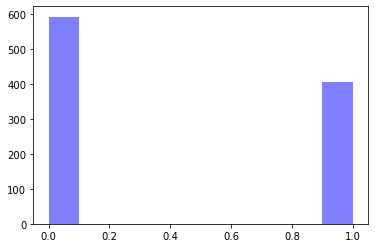

In [4]:
plt.hist(bern(p, size), color = 'b', alpha = 0.5)
plt.show()

## Датчик биномиального распределения

In [5]:
def binom(p, n, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'ins out of bounds [0, 1]')
        return "error"
    if (type(size) == int):
        return (bern(p, (n, size))).sum(0)
    else:
        return (bern(p, (n,) + size)).sum(0)

In [6]:
p = 0.4
n = 100
size = 100000

Проверка биномиального распределения

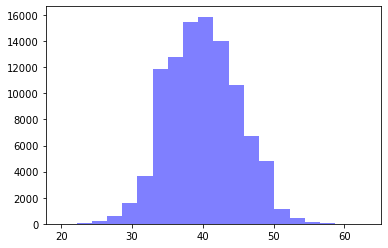

In [7]:
m = n * p;
plt.hist(binom(p, n, size), bins = 20, color = 'b', alpha = 0.5)
plt.show()

### 2. Реализовать генератор геометрического распределения. Проверить для данного распределения свойство отсутствия памяти.

## Генератор геометрического распределения

In [8]:
def geom(p, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'ins out of bounds [0, 1]')
        return "error"
    lam = -np.log(1 - p)
    u = np.random.random_sample(size)
    return np.floor(np.divide(-np.log(np.ones(size) - u), lam))

In [9]:
p = 0.3
size = 100000

Проверка геометрического распределения

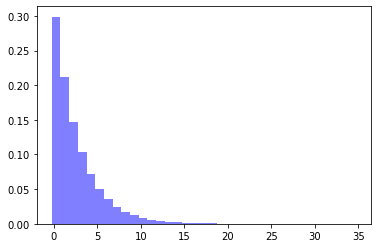

In [10]:
g = geom(p, size)
plt.hist(g, bins = np.arange(-0.25, np.max(g), 1), density = True, color = 'b', alpha = 0.5)
plt.show()

Проверка свойства отсутствия памяти

In [11]:
tau = 5

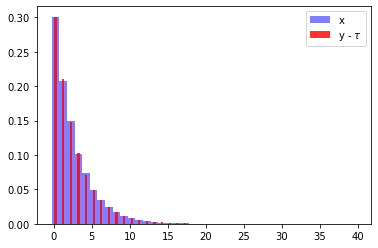

In [12]:
x = geom(p, size)
y = geom(p, int(size / ((1 - p)**tau)))
y = y[y >= tau][0 : size]
plt.hist(x, bins = np.arange(-0.25, np.max(x), 1), density = True, color = 'b', alpha = 0.5, label = 'x')
plt.hist(y - tau, bins = np.arange(-0.25, np.max(x), 1), density = True, color = 'r', alpha = 0.8, rwidth = 0.3, label = r'y - $\tau$')
plt.legend()
plt.show()

### 3. Рассмотреть игру в орлянку - бесконечную последовательность независимых испытаний с бросанием правильной монеты. Выигрыш $S_n$ определяется как сумма по всем $n$ испытаниям значений $-1$ и $1$ в зависимости от выпавшей стороны. Проиллюстровать (в виде ломанной) поведение нормированной суммы $Y(i) = \frac{S_n}  {\sqrt{n}}$, как функцию от номера испытания $i = 1, ..., n$ для одной отдельно взятой траектории. Дать теоретическую оценку для $Y(n)$ при $n \rightarrow \infty$.

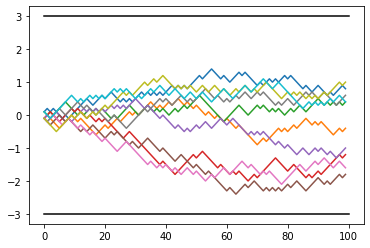

In [13]:
n = 100
for i in range(0, 10):
    s_n = (2 * bern(0.5, n) - 1).cumsum()
    plt.plot(s_n / np.sqrt(n))
plt.plot([0, n], [3, 3], 'k', [0, n], [-3, -3], 'k')
plt.show()

# Задание 2.
### 1. Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу. С помощью критерия Колмогорова убедиться в корректности работы датчика.

## Сингулярное распределение с канторовой лестницей

Носителем распределения является канторова лестница. В троичной записи точек, принадлежащих канторову множеству отсутствует единица. Таким образом, можно задать каждый элемент множетсва (с заданной точностью) при помощи его троичной записи. Для этого сгенерируем схему Бернулли, заменяя $1$ на $2$. Полученная последовательность задает троичную запись числа, то есть, при переходе к десятичной системе счисления, будет получена случайная величина, распределенная сингулярно с канторовой лестницей в качестве функции распределения.

Для определения необходимой точности вычислений (длину генерируемой схемы Бернулли) положим точность $10^{-10}$. При переходе к троичной системе счисления получено, что необходимо вычислить $n = 10\frac{\ln 10}{\ln 3} \approx 21$ знаков после запятой.

In [14]:
def sing(size):
    p = 0.5
    n = 21
    if (type(size) == int):
        x = 2 * (bern(p, (n, size)))
        y = (np.ones((n, size)) / 3).cumprod(0)
    else:
        x = 2 * (bern(p, (n,) + size))
        y = (np.ones((n,) + size) / 3).cumprod(0)
    return (x * y).sum(0)

In [15]:
size = 10000

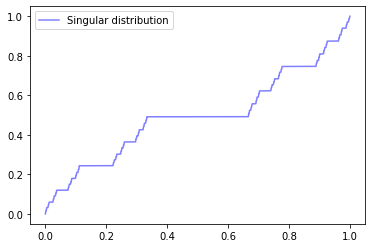

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

sample = sing(size)

ecdf = ECDF(sample)
plt.plot(ecdf.x, ecdf.y, label = 'Singular distribution', c = 'b', alpha = 0.5)
plt.legend()
plt.show()

## Лестница Кантора

Зададим канторову лестницу аналитически для использования критерия Колмогорова.

Для аналитического построения канторовой лестницы представим x в троичной системе счисления. Если в троичной записи числа есть $1$, то выбросим все последующие цифры из записи и заменим все предшествующие $2$ на $1$. Полученная последовательность является записью значения канторовой лестницы в двоичной системе счисления

In [17]:
def cantor(x):
    if (x >= 1):
        return 1
    if (x <= 0):
        return 0
    res = 0
    i = 1
    while (i <= 21):
        c = np.floor(3 * x)
        if (c == 2):
            res = res + 1 / 2**i
        if (c == 1):
            res = res + 1 / 2**i
            break
        i = i + 1
        x = (x - c/3) * 3
    return res

In [18]:
def cantor_vect(xx):
    if type(xx) == int:
        return cantor(xx)
    else:
        res = np.zeros(np.shape(xx))
        for i in enumerate(xx):
            res[i[0]] = cantor(i[1])
    return res

In [19]:
n_plot = 10000

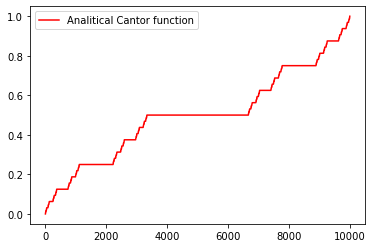

In [20]:
x = np.linspace(0, 1, n_plot)
y = cantor_vect(x)
plt.plot(y, c = 'r', label = 'Analitical Cantor function')
plt.legend()
plt.show()

## Проверка

Проверим правильность построения сингулярного распределения с помощью критерия Колмогорова.

#### Критерий Колмогорова:
Пусть $F(x)$ - заданная функция распределения, $F_{n}(x)$ - эмпирическая функция распределения, построенная по данной выборке. Пусть $D_n = \sup\limits_{x}|F(x) - F_n(x)|$, тогда элементы выборки распределены с функцией $F$ с заданным уровнем согласия $\alpha$ тогда и только тогда, когда $\sqrt{n}D_n \leqslant \gamma$, где $\gamma = K^{-1}(1 - \alpha)$.  

Положим $\alpha = 5%$, тогда $\gamma = 1.36$.

In [21]:
n_hyp = 100
n_sample = 1000
n_plot = 10000

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF

rejected = 0
gamma = 1.36
cant = cantor_vect(np.linspace(0, 1, n_plot))

for i in range(0, n_hyp):
    ecdf = ECDF(sing(n_sample))
    Dn = np.max(np.abs(ecdf(np.linspace(0, 1, n_plot)) - cant))
    if (Dn * np.sqrt(n_sample) > gamma):
        rejected = rejected + 1
    
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  8.0 % of tests.


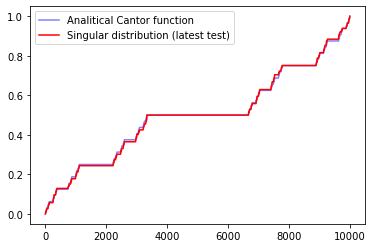

In [23]:
plt.plot(cant, c = 'b', label = 'Analitical Cantor function', alpha = 0.5)
plt.plot(ecdf(np.linspace(0, 1, n_plot)), c = 'r', label = 'Singular distribution (latest test)')
plt.legend()
plt.show()

### 2. Для канторовых случайных величин проверить свойство симметричности относительно $\frac{1}{2}$ ($X$ и $1 - X$ распределены одинаково) и самоподобия относительно деления на $3$ с помощью критерия Смирнова.

## Симметричность распределения

Рассмотрим две выборки, $X_1 \sim \mathcal{Cant}\ (\mathcal{Cant}$ - сингулярное распределение с канторовой лестницей в качестве функции распределения) и $1 - X_2,\ X_2 \sim \mathcal{Cant}$. Покажем, с использованием критерия Смирнова, что $1 - X$ имеет такое же распределение. 

#### Критерий Смирнова:
Пусть $X_1$ и $X_2$ - две выборки. Для того, чтобы проверить, одинаковые ли у низ распределения введем $D_{mn} = \sup\limits_{x}|F_1(x) - F_2(x)|$, где $F_1(x)$ и $F_2(x)$ - эмпирические функции распределения на основе выборок $X_1$ и $X_2$ соответственно. $X_1$ и $X_2$ распределены одинаково тогда и только тогда, когда $\left(\frac{mn}{m + n}\right)^{\frac{1}{2}}D_{mn} \leqslant \gamma$, где $\gamma = K^{-1}(1 - \alpha)$, $\alpha$ - уровень согласия.

Положим $\alpha = 5%$, тогда $\gamma = 1.36$.
В нашем случае $m = n$, а значит, критерий имеет следующий вид: $\sqrt{\frac{n}{2}}D_{mn} \leqslant 1.36$. 

In [24]:
n_hyp = 100
n_sample = 1000
n_plot = 1000

In [25]:
from statsmodels.distributions.empirical_distribution import ECDF

rejected = 0
gamma = 1.36
x = np.linspace(0, 1, n_plot)

for i in range(0, n_hyp):
    x1 = sing(n_sample)
    ecdf1 = ECDF(x1)
    x2 = 1 - sing(n_sample)
    ecdf2 = ECDF(x2)
    Dn = np.max(np.abs(ecdf1(x) - ecdf2(x)))
    if (Dn * np.sqrt(n_sample/2) > gamma):
        rejected = rejected + 1
    
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  4.0 % of tests.


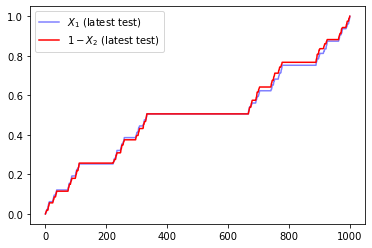

In [26]:
plt.plot(ecdf1(x), c = 'b', label = r'$X_1$ (latest test)', alpha = 0.5)
plt.plot(ecdf2(x), c = 'r', label = r'$1 - X_2$ (latest test)')
plt.legend()
plt.show()

## Самоподобие распределения относительно деления на 3

Аналогично проверке на симметричность рассмотрим распределения $\frac{Y}{3}$ и условное распределение $Y$ при условии $Y \in [0, \frac{1}{3}]$.

In [27]:
n_hyp = 100
n_sample = 1000
n_plot = 1000

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

rejected = 0
gamma = 1.36
x = np.linspace(0, 1, n_plot)

for i in range(0, n_hyp):
    x1 = sing(n_sample)/3
    ecdf1 = ECDF(x1)
    x2 = sing(n_sample * 2)
    x2 = x2[x2 <= 1/3]
    ecdf2 = ECDF(x2)
    Dn = np.max(np.abs(ecdf1(x) - ecdf2(x)))
    if (Dn * np.sqrt(n_sample/2) > gamma):
        rejected = rejected + 1
    
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  3.0 % of tests.


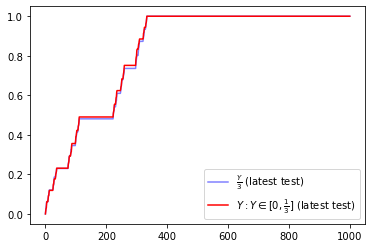

In [29]:
plt.plot(ecdf1(x), c = 'b', label = r'$\frac{Y}{3}$ (latest test)', alpha = 0.5)
plt.plot(ecdf2(x), c = 'r', label = r'$Y: Y \in [0, \frac{1}{3}]$ (latest test)')
plt.legend()
plt.show()

### 3. Вычислить значение математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими для разного объема выборок. Проиллюстрировать сходимость.

## Вычисление матожидания и дисперсии
Пусть $\xi \sim \mathcal{Cant}$, из симетричности распределения относительно $\frac{1}{2}$ следует, что $\mathbb{E}\xi = \frac{1}{2} \sim 0,5$.

Вычислим $\mathbb{E}\xi ^2 = \int\limits_0^1 x^2 dF(x) = \int\limits_0^{\frac{1}{3}} x^2 dF(x) + \int\limits_{\frac{2}{3}}^1 x^2 dF(x)$, используя свойство самоподобия получим, что $\mathbb{E}\xi^2 = \frac{3}{8}$.

Таким образом, $\mathbb{D}\xi = \frac{3}{8} - \frac{1}{4} = \frac{1}{8} \sim 0,125.$

## Эмпирические значения

In [30]:
n_sample1 = 100
n_sample2 = 1000
n_sample3 = 100000

df = pd.DataFrame({
    'Mean': np.zeros(3),
    'Variance': np.zeros(3)},
    index = {n_sample1, n_sample2, n_sample3})

In [31]:
mean1 = np.mean(sing(n_sample1))

mean2 = np.mean(sing(n_sample2))
mean3 = np.mean(sing(n_sample3))

var1 = np.var(sing(n_sample1))
var2 = np.var(sing(n_sample2))
var3 = np.var(sing(n_sample3))

In [32]:
df.loc[n_sample1, 'Mean'] = mean1
df.loc[n_sample2, 'Mean'] = mean2
df.loc[n_sample3, 'Mean'] = mean3

df.loc[n_sample1, 'Variance'] = var1
df.loc[n_sample2, 'Variance'] = var2
df.loc[n_sample3, 'Variance'] = var3

df

,Mean,Variance
1000,0.502976,0.127873
100,0.436552,0.142233
100000,0.498219,0.124912


## Сходимость

Матожидание для каждого $n$ - числа случайных величин $X_n$ рассчитывается следующим образом: $$\mathbb{E}_n = \dfrac{1}{n}\sum\limits_{k = 1}^{n}X_k,$$
а дисперсия: $$\mathbb{D}_n = \dfrac{1}{n}\sum\limits_{k = 1}^{n}(X_k - \bar X)^2$$

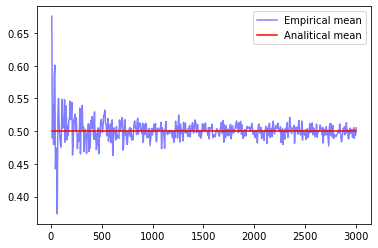

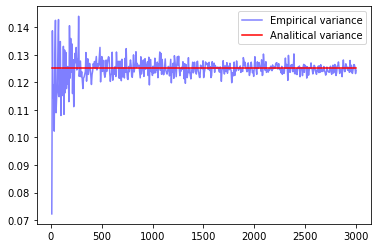

In [33]:
n = 500
m = 0.5
v = 0.125
ns = np.linspace(10, 3000, n)
means = np.zeros(n)
varss = np.zeros(n)

for i in range(0, n):
    sample = sing(int(ns[i]))
    means[i] = sample.mean()
    varss[i] = sample.var()

plt.plot(ns, means, label = 'Empirical mean', c = 'b', alpha = 0.5)
plt.plot([10, 3000], [0.5, 0.5], c = 'r', label = 'Analitical mean')
plt.legend()
plt.show()


plt.plot(ns, varss, label = 'Empirical variance', c = 'b', alpha = 0.5)
plt.plot([10, 3000], [v, v], c = 'r', label = 'Analitical variance')
plt.legend()
plt.show()

# Задание 3.
### 1. Построить датчик экспоненциального распределения. Проверить для данного распределения сойство отсутствия памяти. Пусть $X_1, ..., X_n$ - нзависимо экспоненциально распределенные с.в. с параметрами $\lambda_1, ..., \lambda_n$ соотвестственно. Найти распределение сучайной величины $Y = \min(X_1, ..., X_n).$

## Датчик экпоненциального распределения

In [34]:
def exp(lam, size):
    u = np.random.random_sample(size)
    return np.divide(-np.log(np.ones(size) - u), lam)

In [35]:
lam = 4
size = 1000

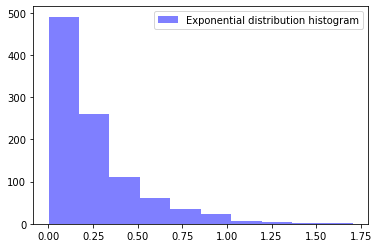

In [36]:
plt.hist(exp(lam, size), label = 'Exponential distribution histogram', color = 'b', alpha = 0.5)
plt.legend()
plt.show()

## Проверка отсутствия памяти

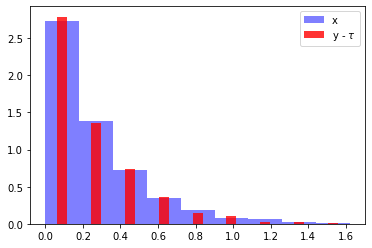

In [37]:
tau = 1
x = exp(lam, size)
y = exp(lam, int(size * np.exp(lam * tau)))
y = y[y >= tau][0 : size]
plt.hist(x, bins = np.linspace(0, np.max(x), 10), density = True, alpha = 0.5, label = 'x', color = 'b')
plt.hist(y - tau, bins = np.linspace(0, np.max(x), 10), density = True, label = r'y - $\tau$', color = 'r', rwidth = 0.3, alpha = 0.8)
plt.legend()
plt.show()


## Распределение минимума 

Рассмотрим независимо экспоненциально распределенные величины $X_1, ..., X_n$ с параметрами $\lambda_1,...,\lambda_n$ соответственно.

Функция распределения $Y = \min(X_1, ..., X_n)$ вычисляется следующим образом:
$$F_y(x) = \mathbb{P}(\min(X_1,...,X_n) < x) = 1 - \prod\limits_{k = 1}^n (1 - F_{X_n}(x)) = 1 - e^{-\sum\limits_{i = 1}^{n}\lambda_i X_i},$$ то есть $Y \sim \mathcal{exp}(\sum\limits_{i = 1}^n \lambda_i).$

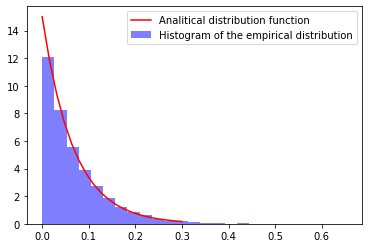

In [38]:
from statsmodels.distributions.empirical_distribution import ECDF

n = 5
size = 10000

lam = (np.random.random_sample(n) * 10 + 1).astype(int)

sample = np.zeros(n * size)
for i in range(0, n):
    sample[i * size : (i + 1) * size] = exp(lam[i], size)  
sample = np.reshape(sample, (n, size))
new_sample = sample.min(0)

x = np.linspace(0, 0.3, 20)

plt.hist(new_sample, density = True, bins = 25, label = 'Histogram of the empirical distribution', color = 'b', alpha = 0.5)
plt.plot(x, lam.sum(0) *  np.exp(-1 * lam.sum(0) * x), label = 'Analitical distribution function', color = 'r')
plt.legend()
plt.show()

### 2. На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.

## Пуассоновское распределение

Рассмотрим пуассоновский процесс $X(t)$ с интенсивностью $\lambda$. В момент времени $1$ $X(1)$ имеет пуассоновоское распределение с параметром $\lambda$. 

Также известно, что скачки в пуассоновском процессе распределены экспоненциально, то есть случайную величину $\eta \sim \mathcal{Pois}(\lambda)$  можно получить как индекс первой суммируемой
случайной величины $\xi_i \sim \mathcal{Exp}(\lambda)$ такой, что $$\sum\limits_{i = 1}^{\eta} \xi_i \geqslant 1.$$

In [39]:
def poisson_exp(lam, size):
    sum = 0
    res = np.zeros(size)
    for i in range(0, size):
        while (sum <= 1):
            sum = sum + exp(lam, 1)
            res[i] = res[i] + 1
        sum = 0
    return res

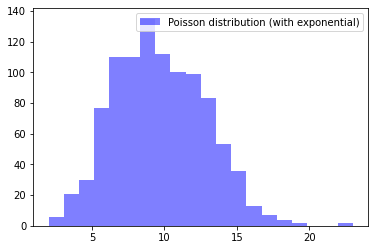

In [40]:
lam = 9
size = 1000
plt.hist(poisson_exp(lam, size), bins = 20, label = 'Poisson distribution (with exponential)', color = 'b', alpha = 0.5)
plt.legend()
plt.show()

### 3. Построить датчик пуассоновского распределения как предел биномиального распределения. С помощью критерия хи-квадрат Пирсона убедиться, что получен датчик распределения Пуассона.

Для построения датчика Пуассоновского распределения воспользуемся теоремой Пуассона.

#### Теорема Пуассона:
Пусть проведено $n \rightarrow \infty$ испытаний Бернулли, причем $p_n \rightarrow 0$, а $np \rightarrow \lambda > 0$, тогда вероятность получить $k$ успехов в $n$ испытаниях Бернулли стремится к величине $\frac{\lambda^k e^{-\lambda}}{k!}$, причем $$\left| \sum\limits_k C_n^k p^k(1 - p)^{n-k} - \sum\limits_k \frac{\lambda^k}{k!}e^{-\lambda} \right| \leqslant np^2.$$

Выберем такой $\epsilon$, что $np^2 = \lambda p = \epsilon$ при заданном $\lambda$. Тогда $p = \frac{\epsilon}{\lambda},\ n = \frac{\lambda}{\epsilon}$. Положим $\epsilon = 10^{-3}.$

In [41]:
def poisson_binom(lam, size):
    eps = 10**(-3)
    p = eps / lam
    n = int(lam / p)
    return binom(p, n, size)

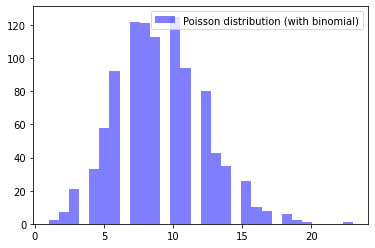

In [42]:
lam = 9
size = 1000
plt.hist(poisson_binom(lam, size), bins = 30, label = 'Poisson distribution (with binomial)', color = 'b', alpha = 0.5)
plt.legend()
plt.show()

## Проверка

Для проверки правильности полученного распределения воспользуемся критерием хи-квадрат Пирсона.

#### Критерий хи-квадрат:
Рассмотрим выборку $X_1, ..., X_n,\ X_i \in [a, b]$. Разделим $[a,b]$ на $m$ непересекабщихся полуинтервалов. Пусть $n_i$ - количество наблюдений, попавших в $i$-й полуинтервал. Пусть $p_j = F(b_j) - F(a_j)$ - вероятность попадания наблюдения в $j$-й интервал при функции распределения $F(x)$, тогда ожидаемое число наблюдений в $j$-м интервале равно $np_j$. Тогда $$Q = \sum\limits_{i = 1}^{m}\dfrac{(n_i - np_i)^2}{np_i} \rightarrow \chi ^2(m - 1), \quad n \rightarrow \infty.$$

Тогда случайные величины в выборке распределены как $F(x)$ тогда и только тогда, когда $Q < \gamma$. Определим $\gamma = \chi _{m - 1}^{-1}(1 - \alpha)$.

In [43]:
def poisson(lam, k):
    if type(k) == int:
        return np.exp(-lam) * (lam ** k) / np.prod(range(1, k + 1))
    
    res = np.zeros(len(k))
    for i in range(0, len(k)):
        res[i] = np.exp(-lam) * (lam ** k[i]) / np.prod(range(1, k[i] + 1))
    return res

In [44]:
from scipy.stats import chi2

lam = 4
size = 500

rejected = 0
n_hyp = 100

x = np.array([0, 3, 4, 5, 6])
n = len(x)

alpha = 0.05
gamma = chi2.ppf(1 - alpha, n)

ps = np.zeros(n)
ps[0] = poisson(lam, 0) + poisson(lam, 1) + poisson(lam, 2)
ps[1 : 4] = poisson(lam, x[1 : 4])
ps[4] = 1 - ps.sum()

for i in range(0, n_hyp):
    ns = np.zeros(n)
    sample = poisson_binom(lam, size)

    ns[0] = (sample == 0).sum() + (sample == 1).sum() + (sample == 2).sum()
    for i in range(1, 4):
        ns[i] = (sample == x[i]).sum()
    ns[4] = size - np.sum(ns)

    ns = ns.astype(int)

    q = np.sum((ns - ps * size) ** 2 / size / ps)
    
    if (q > gamma):
        rejected = rejected + 1
        
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  1.0 % of tests.



### 4. Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные коорадинаты. Проверить при помощи критерия t-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера равенство дисперсий.

В полярной системе координат построим точки, квадрат радиуса которых распределен экспоненциально с $\lambda = \frac{1}{2}$, а угол распределен равномерно. При переходе в декартову систему координат коорадинаты $x, y$ распределены равномерно.

In [45]:
def normal(mu, sigma, size):
    phi = 2 * math.pi * np.random.random_sample(int(np.ceil(size/2)))
    r2 = exp(0.5, int(np.ceil(size/2)))
    x = np.sqrt(r2) * np.sin(phi)
    y = np.sqrt(r2) * np.cos(phi)
    return np.concatenate([x, y])[0:size] * sigma + mu

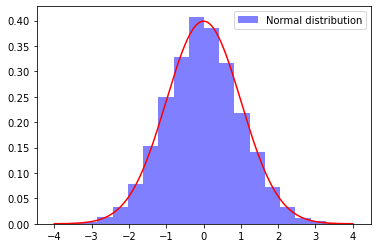

In [46]:
mu = 0
sigma = 1
size = 10000
plt.hist(normal(mu, sigma, size), bins = 20, label = 'Normal distribution', density=True, color = 'b', alpha = 0.5)
x = np.linspace(-4, 4, 1000)
plt.plot(x, 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), color = 'r')
plt.legend()
plt.show()

## Проверка матожидания

Для проверки правильности постоенного распределения воспользуется t-критерием Стьюдента.

#### T-критерий Стьюдента

Пусть $X$ - выборка, эмпирическое распределение которой нормальное со средним $\mu$. Пусть $$\sigma'  = \sqrt{\frac{1}{n - 1} \sum\limits_i (X_i - \bar X)^2}, \quad U = \sqrt{n} \dfrac{\bar X - \mu}{\sigma'}.$$
Тогда $X$ действительно распределено нормально с параметром $\mu$ тогда и только тогда, когда $U \leqslant \gamma,\ \gamma = T^{-1}(1 - \frac{\alpha}{2}),$ где $\alpha$ - уровень солгасия.

In [47]:
from scipy.stats import t

n_hyp = 100
rejected = 0
alpha = 0.05

mu = 1
sigma = 2
size = 1000

gamma = t.ppf(1 - alpha / 2, size - 1)

for i in range(0, n_hyp):
    sample = normal(mu, sigma, size)
    mean = sample.mean()
    s = np.sqrt(np.sum((sample - mean) ** 2) / (size - 1))
    u = np.abs(np.sqrt(size) * (mean - mu) / s)
    if (u >= gamma):
        rejected = rejected + 1
        
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  6.0 % of tests.


##  Проверка равенства дисперсий

Рассмотрим построенное распределение и нормальное распределение с одинаковыми параметрами. С помощью критерия Фишера проверим равенство дисперсий выборок, полученных разными способами.

#### Критерий Фишера:

Пусть $X_1$ и $X_2$ - выборки размера $m$ и $n$ соответственно с нормальным распределением с параметрами $\mu$ и $\sigma$. Пусть $$V = \dfrac{\sum\limits_i (X_i - \bar X)^2 (m - 1)}{(m - 1)\sum\limits_i (Y_i - \bar Y)^2}.$$
Дисперсии равны при $V \in [\gamma_1, \gamma_2],$ где $\gamma_1 = F_{(n - 1)(m - 1)}^{-1}\left(\dfrac{\alpha}{2}\right),$ а $\gamma_2 = F_{(n - 1)(m - 1)}^{-1}\left(1 - \dfrac{\alpha}{2}\right).$

In [48]:
from scipy.stats import f

n_hyp = 100
rejected = 0
alpha = 0.05

mu = 0
sigma = 1
size = 1000

gamma1 = f.ppf(alpha / 2, size - 1, size - 1)
gamma2 = f.ppf(1 - alpha / 2, size - 1, size - 1)

for i in range(0, n_hyp):
    sample1 = normal(mu, sigma, size)
    sample2 = np.random.randn(size)
    V = sample1.var() / sample2.var()
    if (V >= gamma2) or (V <= gamma1):
        rejected = rejected + 1
        
print('Rejected ', rejected/n_hyp * 100, '% of tests.')

Rejected  6.0 % of tests.


# Задание 4.
### 1. Построить датчик распределения Коши.

Построим датчик распределения Коши с использованием равномерного распределения. Пусть $X \sim \mathcal{U}[0, 1]$, тогда $\tan(\pi (X - \frac{1}{2})) \sim \mathcal{C}(0, 1)$. Для получения распределения Коши с параметрами $x_0, \gamma$ воспользуемся формулой $X_1 = \gamma X_0 + x_0,$ где $X_1 \sim \mathcal{C}(x_0, \gamma),\ X_0 \sim \mathcal{C}(0, 1)$

In [49]:
def cauchy(x_0, gamma, size):
    sample = np.random.random_sample(size)
    return gamma * (np.tan(np.pi * (sample - 0.5))) + x_0

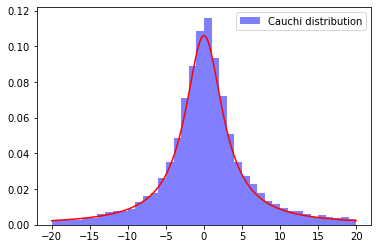

In [50]:
x_0 = 0
gamma = 3
size = 10000
x = np.linspace(-20, 20, size)
plt.plot(x, 1 / np.pi / gamma / (1 + ((x - x_0)/gamma)**2), color = 'r')
plt.hist(cauchy(x_0, gamma, size), label = 'Cauchi distribution', range = (-20, 20), alpha = 0.5, color = 'b', density = True, bins = 40)
plt.legend()
plt.show()

### 2. На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи функции normal probability plot убедиться в корректности построенного датчика и обосновать наблюдаемоую линейную зависимость.

Рассмотрим генератор распределения Коши и построим по нему стандартное нормальное распределение. 

Пусть $c(x)$ - плотность распрелеоения Коши, $n(x)$ - плотность стандартного нормального распределения. 

Введем $k$ такое, что $\dfrac{n(x)}{c(x)} \leqslant k$.

Воспользуемся следующим алгоритмом:
1.  сгенерируем $X \sim \mathcal{C}(0, 1),\ Y \sim \mathcal{U}[0, 1]$;
2. рассмотрим неравенство $\dfrac{n(X)}{c(X)} \leqslant k U$: если оно выполнено, то $X \sim \mathcal{N}(0, 1)$, иначе - нет.

Выберем подходящее $k$. 
$$h(x) = \dfrac{n(x)}{c(x)} = \sqrt{\dfrac{\pi}{2}}\dfrac{e^{-\frac{x^2}{2}}(x^2 + \gamma^2)}{\gamma},$$ минимум функции достигается при $\gamma = 1$, при этом $h(1) = \sqrt{2\pi}e^{-\frac{1}{2}} = k$.

In [51]:
def normal_cauchy(mu, sigma, size):
    k = np.sqrt(2*np.pi) * np.exp(-0.5)
    res = []
    while (len(res) < size):
        c = cauchy(0, 1, 2 * size)
        u = np.random.random_sample(2 * size)
        res = np.concatenate([res, c[np.sqrt(np.pi / 2) * np.exp(-(c ** 2) / 2) * (c ** 2 + 1) > k * u]])
    return sigma * res + mu

In [52]:
print(normal(0, 1, 1))

[-0.10826577]


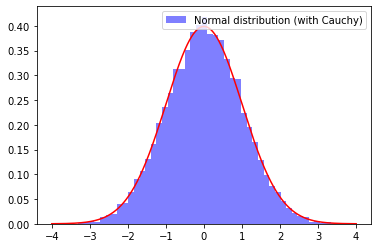

In [53]:
mu = 0
sigma = 1
size = 10000
x = np.linspace(-4, 4, 1000)
plt.plot(x, 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), color = 'r')
plt.hist(normal_cauchy(mu, sigma, size), bins = 50, label = 'Normal distribution (with Cauchy)', density=True, color = 'b', alpha = 0.5)
plt.legend()
plt.show()

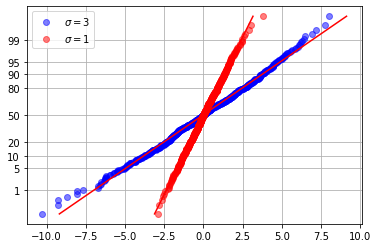

In [54]:
from scipy import stats

samp = normal_cauchy(0, 1, 500)
(quants, vals), (slope, inter, r) = stats.probplot(samp, dist='norm')

samp2 = normal_cauchy(0, 3, 500)
(quants2, vals2), (slope2, inter2, r2) = stats.probplot(samp2, dist='norm')

plt.plot(vals2, quants2, 'o', label=r'$\sigma=3$', color = 'b', alpha = 0.5)
plt.plot(quants2 * slope2 + inter2, quants2, 'r')

plt.plot(vals, quants, 'o', label=r'$\sigma=1$', color = 'r', alpha = 0.5
        )
plt.plot(quants * slope + inter, quants, 'r')

ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan,ticks_perc)

plt.legend()
plt.grid()
plt.show()

### 3. Сравнить скорость моделирования стандартного нормального распределения в заданиях 3 и 4.

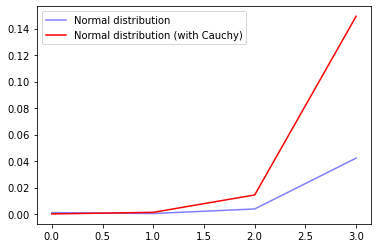

In [55]:
from time import time

n = 10
p = np.array([2, 4, 5, 6])
T1 = np.zeros((n, len(p)))
T2 = np.zeros((n, len(p)))

for i in range(0, n):
    for j in range(0, len(p)):
        t = time()
        a = normal(0, 1, 10 ** p[j])
        T1[i, j] = time() - t

t1 = np.median(T1, 0)

for i in range(0, n):
    for j in range(0, len(p)):
        t = time()
        a = normal_cauchy(0, 1, 10 ** p[j])
        T2[i, j] = time() - t

t2 = np.median(T2, 0)

plt.plot(t1, color = 'b', alpha = 0.5, label = 'Normal distribution')
plt.plot(t2, color = 'r', label = 'Normal distribution (with Cauchy)')
plt.legend()
plt.show()

# Задание 5.

### 1. Пусть $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Убедиться эмпирически в справедливости ЗБЧ и ЦПТ, т.е. исследовать поведение суммы $S_n$ и эмпирического распределения величины $$\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right).$$

## Проверка ЗБЧ

В случае выполнения закона больших чисел, $\dfrac{S_n}{n} \rightarrow \mu$ или $S_n \rightarrow n \mu$.

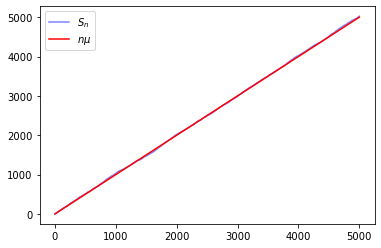

In [56]:
mu = 1
sigma = 1
n = 5000

x = np.ones(n).cumsum()

sample = normal(mu, sigma**2, n)
Sn = np.cumsum(sample)

plt.plot(Sn, color = 'b', alpha = 0.5, label = r'$S_n$')
plt.plot(mu * x, color = 'r', label = r'$n \mu$')
plt.legend()
plt.show()

## Проверка ЦПТ

Покажем, что $\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right)$ рапределено нормально с параметрами 0, $\sigma$.

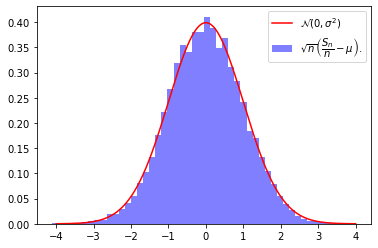

In [57]:
from scipy.stats import norm

mu = 1
sigma = 1
n = 10000

sample = np.zeros(n)
x = np.linspace(-4, 4, 100000)

for i in range(0, n):
    sample[i] = np.sqrt(n) * (normal(mu, sigma**2, n).mean() - mu)
    
plt.hist(sample,  bins = 50, label = r'$\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right).$', density=True, color = 'b', alpha = 0.5)
plt.plot(x, norm.pdf(x / sigma) / sigma, color = 'r', label = r'$\mathcal{N}(0, \sigma^2)$')
plt.legend()
plt.show()

### 2. Считая $\mu$ и $\sigma$ неизвестными, для пункта 1 построить доверительне интервалы для среднего и дисперсии.

## Доверительный интервал для матожидания

Известно, что $$U = \sqrt{n} \dfrac{\bar X - \mu}{\sigma'} \sim \mathcal{St}(n - 1),$$ где $\sigma' = \dfrac{1}{n - 1} \sum (X_i - \bar X)^2$.

Тогда $$\mathbb{P}(\gamma_1 < U < \gamma_2) = \mathbb{P}\left(\bar X - \dfrac{\sigma' \gamma_2}{\sqrt{n}} < \mu < \bar X - \dfrac{\sigma' \gamma_1}{\sqrt{n}}\right) = 1 - \alpha = T(\gamma_2) - T(\gamma_1),$$
где $T(x)$ - функция распределения Стьюдента с $n - 1$ степенями свободы.

Таким образом, $\gamma_1 = T^{-1}(\frac{\alpha}{2}),\ \gamma_2 = T^{-1}(1 - \frac{\alpha}{2})$, а $\mu$ лежит в интервале $\left(\bar X - \dfrac{\sigma' \gamma_2}{\sqrt{n}}, \bar X - \dfrac{\sigma' \gamma_1}{\sqrt{n}}\right)$.

In [58]:
from scipy.stats import t

mu = 0
sigma = 1
size = 1000

alpha = 0.05
n_hyp = 100
rejected = 0

gamma1 = t.ppf(alpha / 2, size - 1)
gamma2 = t.ppf(1 - alpha / 2, size - 1)

for i in range(1, n_hyp):
    sample = normal(mu, sigma**2, size)
    mean = sample.mean()
    s = np.sqrt(np.sum((sample - mean) ** 2) / (size - 1))
    if (mu < mean - s * gamma2 / np.sqrt(size)) or (mu > mean - s * gamma1 / np.sqrt(size)):
        rejected = rejected + 1

print('Wrong interval in ', rejected/n_hyp * 100, '% of tests.')

Wrong interval in  6.0 % of tests.


## Доверительный интервал для дисперсии

Известно, что $$V = \dfrac{\sum\limits_{i = 1}^{n} (X_i - \bar X)^2}{\sigma^2} \sim \chi^2(n - 1).$$

Тогда $$\mathbb{P}(\gamma1 < V < \gamma2) = \mathbb{P}\left(\dfrac{\sum (X_i - \bar X)^2}{\gamma_2} < \sigma^2 < \dfrac{\sum (X_i - \bar X)^2}{\gamma_1}\right) = 1 - \alpha = \chi(\gamma_2) - \chi(\gamma_1).$$

Таким образом, $\gamma_1 = \chi^{-1}(\frac{\alpha}{2}),\ \gamma_2 = \chi^{-1}(1 - \frac{\alpha}{2})$, а $\sigma^2 \in \left(\dfrac{\sum (X_i - \bar X)^2}{\gamma_2}, \dfrac{\sum (X_i - \bar X)^2}{\gamma_1} \right)$

In [59]:
from scipy.stats import chi2

mu = 0
sigma = 1
size = 1000

alpha = 0.05
n_hyp = 100
rejected = 0

gamma1 = chi2.ppf(alpha / 2, size - 1)
gamma2 = chi2.ppf(1 - alpha / 2, size - 1)

for i in range(1, n_hyp):
    sample = normal(mu, sigma**2, size)
    if (sigma**2 < size * sample.var() / gamma2) or (sigma**2 > size * sample.var() / gamma1):
        rejected = rejected + 1

print('Wrong interval in ', rejected/n_hyp * 100, '% of tests.')

Wrong interval in  0.0 % of tests.


### 3. Пусть $X_i \sim \mathcal{C}(x_0, \gamma)$ имеет распределение Коши со сдвигом $x_0$ и масштабом $\gamma$. Проверить эмпирически, как ведут себя суммы $\frac{S_n}{n}$. Результат объяснить, а также найти закон распределения данных сумм.

Так как распределение Коши не имеет матожидания или дисперсии, то закон больших чисел выполняться не будет. 

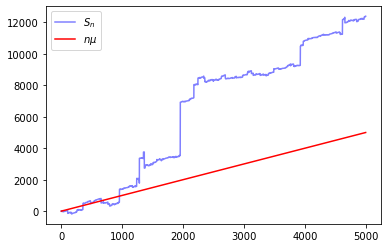

In [60]:
x_0 = 1
gamma = 1
n = 5000

x = np.ones(n).cumsum()

sample = cauchy(x_0, gamma, n)
Sn = np.cumsum(sample)

plt.plot(Sn, color = 'b', alpha = 0.5, label = r'$S_n$')
plt.plot(x_0 * x, color = 'r', label = r'$n \mu$')
plt.legend()
plt.show()

## Закон распределения сумм

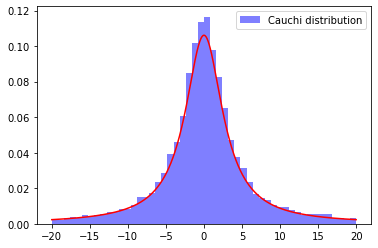

In [61]:
x_0 = 0
gamma = 3
n = 1000
size = 10000
x = np.linspace(-20, 20, size)
plt.plot(x, 1 / np.pi / gamma / (1 + ((x - x_0)/gamma)**2), color = 'r')
plt.hist(cauchy(x_0, gamma, (n, size)).sum(0) / n, label = 'Cauchi distribution', range = (-20, 20), alpha = 0.5, color = 'b', density = True, bins = 50)
plt.legend()
plt.show()

Эмпирически получено, что $\frac{S_n}{n} \sim \mathcal{C}(x_0, \gamma)$. Покажем, что это действительно так. Для этого рассмотрим характеристическую функцию распределения Коши:
$$\varphi(t) = \mathbb{E}e^{it\xi} = \dfrac{1}{\pi}\int\dfrac{\gamma e^{itx}}{(x - x_0)^2 + \gamma^2}dx = e^{itx_0 - |t|\gamma}.$$

Известно также, что из $\xi \sim \varphi$ следует $\sum\limits_{k = 1}^{n}\xi_k = \varphi^n$. Тогда $$\varphi_{\frac{S_n}{n}}(t) = \left[\varphi\left(\frac{t}{n}\right)\right]^n = e^{itx_0 - |t|\gamma},$$
то есть $\dfrac{S_n}{n} \sim \mathcal{C}(x_0, \gamma).$

# Задание 6.

### 1. Посчитать интеграл $$I = \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}\ldots\int\limits_{-\infty}^{\infty}\dfrac{e^{-\left(x_1^2 + \ldots + x_{10}^2 + \frac{1}{2^7 \cdot x_1^2 \cdot \ldots\cdot x_{10}^2}\right)}}{x_1^2 \cdot \ldots \cdot x_{10}^2}dx_1dx_2\ldots dx_{10}$$
- методом Монте-Карло;
- методом квадратур, сводя задачу к вычислению собственного интеграла Римана.

## Метод Монте-Карло

Представим интеграл в виде матожидания от некоторого десятимерного распределения. 

Заметим, что плотность десятимерного нормального распределенияс параметрами $\mu = 0,\ \sigma^2 = \frac{1}{2}$ выглядит следующим образом:
$$p(x) = \dfrac{1}{\pi^5}e^{-\sum x_k^2}.$$
Тогда интеграл $I$ можно преддставить в виде:
$$I = \pi^5 \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}\ldots\int\limits_{-\infty}^{\infty} y e^{-\frac{y}{2^7}}p(x)dx = \pi^5 \mathbb{E}\left[y e^{-\frac{y}{128}}\right] \approx \pi^5 \dfrac{1}{n} \sum\limits_{k = 1}^{n}y_k e^{-\frac{y_k}{128}},$$
где $X_j^{(k)} \sim \mathcal{N}\left(0, \frac{1}{2}\right),\ j = 1,\ldots, 10,\ k = 1, \ldots, n;\ y_k = \left[ \prod\limits_{j = 1}^{10} X_j^{(k)}\right]^{-2}.$

In [62]:
n = 10**(6)
y = (np.reshape(normal(0, np.sqrt(0.5), 10 * n), (10, n)).prod(0)) ** (-2)
res = (np.pi ** 5) * (y * np.exp(-y / 128)).mean()
print(res)

125.54531830061511


## Метод квадратур

Введем замену $$x_i = \tan y_i \Rightarrow dx_i = \frac{1}{\cos^2 y_i}dy_i,\quad i = 1,\ldots,10.$$


При такой замене интеграл $I$ примет вид:$$I =  \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \ldots \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \prod \dfrac{1}{\sin^2 y_k} \exp\left\{-\sum \tan^2 y_k - \frac{1}{128} \prod \cot^2 y_k \right\} dy_1 \ldots dy_{10}.$$

Заметим, что интеграл четный, значит можно рассматривать отрезки $[0, \frac{\pi}{2}]$, при этом необходимо домножить полученный результат на $2^{10}$, то есть удвоить по каждому измерению.
Разобьем каждый из $10$ отрезков $[0, \frac{\pi}{2}]$ на $m$ равных подынтервалов, в каждом подынтервале выберем среднее значение и получим сетку из $m - 1$ элементов по каждому разряду. Сопоставим каждой точке на интервале ее порядковый номер (от $1$ до $m - 1$).

Заметим, что подынтегральная функция симметрична по всем аргументам, а значит, можно перебирать не все возможные комбинации точек, а только те, номера которых упорядочены и не убывают. Такие комбинации определяются в функции get_ii(), принимающей на вход предыдущую возможную (стартовая - все нули) последовательность.

Назовем весом количество комбинаций, которые приводятся к рассматриваемой при упорядочивании элементов. Для того, чтобы учесть все обобщаемые точки, необходимо умножить значения функций в этих точках на их вес. 
Для вычисления весов каждой из комбинаций воспользуемся формулой:

$$w = \dfrac{n!}{n_1!\cdot\ldots n_{m - 1}!},$$
где $n_i$ - количество элементов в строке, принимающих значение $i$, $i = 1,\ldots,m$.

Полученная сумма умножается на $h^{10} = \left[\dfrac{\pi}{2m}\right]^{10}$, затем на $2^{10}$, упрощая, получим коэффициент $(2h)^{10}$. 

Таким образом, интеграл вычисляется многомерным методом прямоугольников, а выбор точек специального вида позволяет упростить вычисления.

In [63]:
def fact(n): #считает факториал
    if (n == 0):
        return 1
    return np.prod(range(1, n + 1))

In [64]:
def coef(ns): #считает вес комбинации
    ns = ns[ns != 0]
    res = fact(ns.sum())
    for i in range(0, len(ns)):
        res = res / fact(ns[i])
    return res

In [65]:
def fun(y): #та самая подынтеральная функция
    tans = np.tan(y) ** 2
    return np.exp(-tans.sum() - np.prod(1 / tans) / 128) * np.prod(1 / (np.sin(y))**2)

In [66]:
def get_ii(s, m):
    for i in range(-1, -len(s) - 1, -1):
        if (s[i] < m - 1):
            s[i:] = (s[i] + 1) * np.ones(np.shape(s[i:]))
            return s.astype(int)
    return -1

In [67]:
m = 12
n = 10

res = 0

h = np.pi / 2 / m
x = [0 + h * (i + 0.5) for i in range(0, m)]

ii = np.zeros(n)

while 1:
    ii = get_ii(ii, m)
    if (np.prod(ii == -1)):
        break
    ns = np.array([np.array((ii == i)).astype(int).sum() for i in range(0, m)])
    res += coef(ns) * fun(np.array([x[i] for i in ii]))
res = res * ((2 * h) ** 10)
print(res)

124.98912846401929


### 2. Для каждого случая оценить точность вычислений.

## Метод Монте-Карло

Для оценки ошибки $\varepsilon$ на выборке размера $n$ с уровнем доеврия $\alpha$ воспользуемся неравенством Чебышева:
$$\mathbb{P} \left( \left| \dfrac{1}{n} \sum\limits_{i = 1}^{n} f(Y_i) - \mathbb{E} [f(Y)] \right| \geqslant \varepsilon \right) \leqslant \mathbb{D}\dfrac{[f(Y)]}{n \varepsilon^2} = \alpha.$$
В качестве $\mathbb{D}[f(Y)]$ используем выборочную дисперсию. Положим $\alpha = 5$%, $n = 10^{5}$.

In [68]:
n = 10**7
alpha = 0.05
y = (np.reshape(normal(0, 1 / np.sqrt(2), 10 * n), (10, n)).prod(0)) ** (-2)
var = (np.pi ** 5 * y * np.exp(-y / 128)).var()
res = np.sqrt(var / n / alpha)
print(res)

1.611513547148326


## Метод квадратур

Для оценки погрешности воспрользуемся разложением подынтегральной функции $f(x)$ в ряд Тейлора до первого члена:
$$f(x) = f(x_0) + \langle \nabla f(\xi), \Delta x\rangle,$$
где $x_0$ - центр десятимерного гиперкуба $\Delta$, а $\xi$ лежит в нем.

Тогда погрешность по каждому из измерений составляет:
$$\int\limits_{\Delta} \langle \nabla f(\xi), \Delta x \rangle \leqslant \sup\limits_{\Delta}\| \nabla f(x) \| \|\Delta x\| \mu(\Delta) \leqslant \dfrac{\sqrt{n}}{2}h^{n + 1} \sup\limits_{\left[ -\frac{\pi}{2}, \frac{\pi}{2}\right]} \|\nabla f(x)\|,$$
а общая ошибка не превосходит $\dfrac{\pi^n h \sqrt{n}}{2} \sup\limits_{\left[ -\frac{\pi}{2}, \frac{\pi}{2} \right]} \|\nabla f(x)\|$. 

Ошибка убывает линейно по $h$, однако для достижения маленькой ошибки необходима большая вычислительная мощность.

# Задание 7.

### 1. Методом случайного поиска найти минимальное значение функции $f$ на множестве $A = \{x_1, x_2: x_1^2 + x_2^2 \leqslant 1 \}$, т.е. $y = \min\limits_{x \in A}f(x)$, где $$f(x) = x_1^3 \sin \left(\dfrac{1}{x_1} \right) + 10 x_1 x_2^4 \cos \left( \dfrac{1}{x_2} \right)$$ при $x_1 \not= 0$ и $x_2 \not= 0$, функция доопределяется по непрерывности при $x_1 = 0$ или $x_2 = 0$.

Для поиска минимума методом случайного поиска сгенерируем равномерное распределение точек по кругу и среди них найдем наименьшее значение. 

Необходимое количество точек определяется через вероятность не попасть в $\Delta x$ окрестность точки минимума. Вычислим необходимый $n$ (число точек).
Вероятность попасть в круг, но не попасть в $\Delta x$ окрестность точки минимума $x_*$, при выборе одной точки определяется как $\mathbb{P} = 1 - \frac{\pi \Delta x^2}{\pi} = 1 - \Delta x^2$, следовательно, при выборе $n$ точек $\mathbb{P}_n = (1 - \Delta x^2)^n$. Зафиксируем $p$ - вероятность не попасть в указанную окрестность. Тогда $(1 - \Delta x ^2)^n = p$, а $n = \frac{\ln p}{\ln (1 - \Delta x^2)}$.

Выберем окрестность $\Delta x$ таким образом, чтобы для фиксированной погрешности $\varepsilon$ выполнялось $|f(x_*) - f(x)| < \varepsilon$: $|f(x_*) - f(x)| < \|\nabla f \| |\Delta x|,$ оценим $\|\nabla f\|$.
$$\dfrac{\partial f}{\partial x_1} = 3 x_1^2 \sin \left( \dfrac{1}{x_1} \right) - x_1 \cos\left( \dfrac{1}{x_1} \right) + 10 x_2^$ \cos\left( \dfrac{1}{x_2} \right) \leqslant 14,$$
$$\dfrac{\partial f}{\partial x_2} = 40 x_1 x_2^3 \cos \left( \dfrac{1}{x_2} \right) + 10 x_1 x_2^2 \sin\left( \dfrac{1}{x_2} \right) \leqslant 50,$$
такми образом, $\| \nabla f \| \leqslant \sqrt{14^2 + 50^2} \approx 52 = C.$ Тогда $\Delta x = \dfrac{\varepsilon}{C}$.

Для удобства перейдем в полярную систему координат. 
При равномерном распределении точек по единичному кругу полученные случайные величины распределены следующим образом:
$$\mathbb{P}(\xi \in B) = \iint\limits_{B}p(x)dxdy = \{\text{к полярной системе координат}\} = \dfrac{1}{2\pi}\iint\limits_{B}dr^2d\varphi,$$
то есть $\varphi \sim \mathcal{U}[0,2\pi]$, а $r$ имеет функцию распределения:
$$F_r(x) = \left\{
\begin{aligned}
    &0,\quad x < 0\\
    &x^2,\quad x \in [0, 1]\\
    &1,\quad x > 1
\end{aligned}
\right.$$
С помощью метода обратных функций определяется $r \sim \sqrt{u},\ u \sim \mathcal{U}[0, 1]$.

In [69]:
def fun_min_val(x1, x2):
    res = x1 ** 3 * np.sin(1 / x1) + 10 * x1 * x2 ** 4 * np.cos(1 / x2)
    return res

In [70]:
eps = 10 ** (-2)
p = 0.05
c = 52
step = eps / c
n = int(np.log(p) / np.log(1 - step ** 2))
print(n)
 
r_sample = np.sqrt(np.random.random_sample(n))
phi_sample = 2 * np.pi * np.random.random_sample(n)

print(fun_min_val(r_sample * np.sin(phi_sample), r_sample * np.cos(phi_sample)).min())

81004599
-1.2884382296622996


### 2. Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $
\mathbb{R}^2$, где $$g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2.$$

Введем вспомогательные функции при решении задачи.

In [71]:
def fun_rosenbrock(x1, x2):
    return (x1 - 1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

Предполагаемый следующий шаг алгоритма ($new = [new_x, new_y]$) распределен как $\mathcal{N}(cur, cur_t \sigma^2)$, где $cur = [cur_x, cur_y]$ - текущий шаг алгоритма, $cur_t$ - температура в текущий момент времени, $\sigma$ - параметр.

In [72]:
def new_state(cur_x, cur_y, t):
    new_x = normal(cur_x, np.sqrt(t) *  sigma * np.sqrt(1 + abs(cur_x)), 1)
    new_y = normal(cur_y, np.sqrt(t) * sigma * np.sqrt(1 + abs(cur_y)), 1)
    return (new_x, new_y)

Функция $$p(\Delta f, cur_t) = e^{-\frac{|\Delta f|}{cur_t}},$$ где $\Delta f = f(cur) - f(next)$, определяет вероятность, с которой на каждом шаге выбирается точка (меняется на следующую или сохраняется текущая). 

In [73]:
def p(df, t):
    return np.exp(-abs(df) / t)

В следующей функции происходит выбор точки для следующего шага алгоритма. Если $\Delta f > 0$, то всегда выбирается следующая точка (на которой достигается меньшая точка). Если неравенство не выполнено, то вероятность перехода к следующей точке определяется функцией $p(\Delta f, cur_t)$.

In [74]:
def choose_state(new_x, new_y, cur_x, cur_y, t):
    df = fun_rosenbrock(cur_x, cur_y) - fun_rosenbrock(new_x, new_y) 
    if (df > 0) or (bern(p(df, t), 1)):
        return (new_x, new_y)
    return (cur_x, cur_y)

Функция $t\_next(cur_t)$ контролирует изменение температуры (ее уменьшение с коэффициентом $k$).

In [75]:
def t_next(cur_t):
    return k * cur_t

В результате, с использованием описанных функций, на каждом шаге происходит выбор точки. Работа алгоритма останавливается, когда температура приближается к нулю ($t < 10^{-6}$).

In [76]:
from time import time


def annealing(g):

    i = 0
    t = time()

    cur_x = np.random.random_sample() * 20 - 10
    cur_y = np.random.random_sample() * 20 - 10
    cur = [cur_x, cur_y]
    if (g == 1):
        print('x_0 = ', cur_x)
        print('y_0 = ', cur_y)

    cur_t = t_0

    while cur_t > 10 ** (-6):
        i += 1
        new = new_state(cur[0], cur[1], cur_t)
        cur = choose_state(new[0], new[1], cur[0], cur[1], cur_t)
        cur_t = t_next(cur_t)
        if (g == 1):
            plt.plot(cur[0], cur[1], 'bo', alpha = 0.5)

    if (g == 1):
        plt.plot(cur[0], cur[1], '*r')
        print('x* = ', cur[0])
        print('y* = ', cur[1])
        print('f(x*, y*) = ', fun_rosenbrock(cur[0], cur[1]))
        print('Inaccuracy = ', abs(1 - cur[0]), abs(1 - cur[1]))
        print('The algorithm made ', i, ' iterations, it took ', time() - t, 'seconds.')

    return (cur[0], cur[1], i, time() - t)

In [77]:
k = 0.99
t_0 = 2
sigma = 1 / t_0

res = annealing(0)
print(res)

(array([1.01482777]), array([1.02988541]), 1444, 0.29717350006103516)


0.1284480094909668


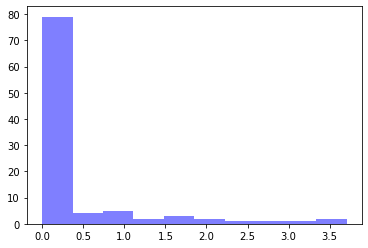

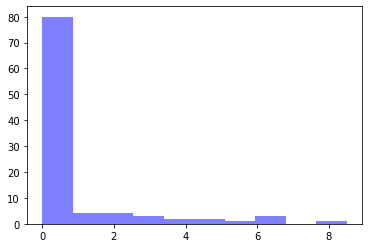

In [78]:
n = 100

T = np.zeros(n)

Inac_x = np.zeros(n)
Inac_y = np.zeros(n)

for j in range(0, n):
    res = annealing(0)
    T[j] = res[3]
    Inac_x[j] = abs(1 - res[0])
    Inac_y[j] = abs(1 - res[1])

print(np.median(T))
plt.hist(Inac_x, color = 'b', alpha = 0.5)
plt.show()
plt.hist(Inac_y, color = 'b', alpha = 0.5)
plt.show()

# Задание 8.

### Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге:
### $$\left\{
\begin{aligned}
&\Delta u = 0,\ (x, y) \in D\\
&u|_{\delta D} = f(x, y)\\
&u \in C^2(D),\ f \in C(\delta D)\\
&D = \{x, y:\ x^2 + y^2 \leqslant 1 \}
\end{aligned}
\right.$$
### Для функции $f(x, y) = x^2 - y^2$ найти аналитическое решение и сравнить с полученным по методу Монте-Карло.

Аналитическим решением задачи является функция $u(x, y) = x^2 - y^2.$

## Метод Монте-Карло

Разобьем область $D$ на сетку с шагом $h$. Чтобы понять, является ли точка граничной воспользумся следующими условиями:
$$\begin{gather} x^2 + y^2 \leqslant 1;\\ x^2 + y^2 + h^2 + 2h\max\{|x|, |y|\} > 1\end{gather}.$$
Если выполнено первое условие, то рассматриваемая точка с координатами $(x, y)$ принадлежит области $D$, если также выполнено и второе неравенство, то рассматриваемая точка является граничной (хотя бы одна из трех соседних точек лежит вне области $D$).

Из каждой внутренней точки можно двигаться в четырех направлениях (вправо, влево, вверх или вниз), выбор направления случаен. Последовательным переходом из одной точки в другую можно попасть на границу. Найдем сумму значений заданной на границе функции $f(x)$ при N запусках процесса из некоторой фиксированной внутренней точки $P$ и поделим полученную сумму на $N$. Таким образом, получено значение функции $u(P)$.



In [79]:
def fun_laplas(x, y):
    #print(x, y)
    return x**2 - y**2

In [80]:
def in_range(x, y): #returnes: 0 - out of range; 1 - inside; 2 - on bound
    #print('a ', x, y)
    if (x**2 + y**2 <= 1):
        if (x**2 + y**2 + h**2 + 2 * h * max(abs(x), abs(y)) > 1):
            return 2
        else:
            return 1
    else:
        return 0

In [81]:
def next_step(i, j): #gives next coordinate
    step = (bern(0.5, 1) * 2 - 1) * bern(0.5, 1)
    if (i < 19) and (i > 0):
        i += step
    elif (i <= 0):
        i += abs(step)
    else:
        i -= abs(step)
        
    if (j < 19) and (j > 0):
        j += (bern(0.5, 1) * 2 - 1) * (1 - abs(step))
    elif (j <= 0):
        j += 1 - abs(step)
    else:
        j -= 1 - abs(step)   
    return (i, j)

In [82]:
def get_value(X, Y, i0, j0):
    coord = np.array([i0, j0])
    traj_i = (i0,)
    traj_j = (j0, )
    #print(i0, j0)
    while (in_range(X[coord[0], coord[0]], Y[coord[1], coord[1]]) != 2):
        coord = next_step(coord[0], coord[1])
        #print(X[coord[0], coord[0]], Y[coord[1], coord[1]])
        #print(coord)
        traj_i = traj_i + (int(coord[0]),)
        traj_j = traj_j + (int(coord[1]),)
    return (traj_i, traj_j, fun_laplas(X[int(coord[0]), int(coord[0])], Y[int(coord[1]), int(coord[1])]))

In [83]:
def get_coord(P, X, Y):
    n_p = np.shape(P)[0]
    Coord_i, Coord_j = np.where(P == P.min())
    coord_i = Coord_i[0]
    coord_j = Coord_j[0]
    while (in_range(X[int(coord_i), int(coord_i)], Y[int(coord_j), int(coord_j)]) != 1):
        P[int(coord_i), int(coord_j)] = n_step
        Coord_i, Coord_j = np.where(P == P.min())
        coord_i = Coord_i[0]
        coord_j = Coord_j[0]
    return (int(coord_i), int(coord_j))

In [84]:
n = 20
n_step = 500

In [85]:
h = 2 / n

x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
XY = np.meshgrid(x, y)
X, Y = np.meshgrid(x, y)

Passed = np.zeros((n, n))
Res_sum = np.zeros((n, n))
coord = np.zeros(2)

while np.any(Passed < n_step):
    coord = get_coord(Passed, X, Y)
    res = get_value(X, Y, coord[0], coord[1])
    #print(res)
    Passed[res[0], res[1]] += 1
    Res_sum[res[0], res[1]] += res[2]
    #print(Passed)

#print(Passed)
#print(Res_sum / Passed)



<IPython.core.display.Javascript object>


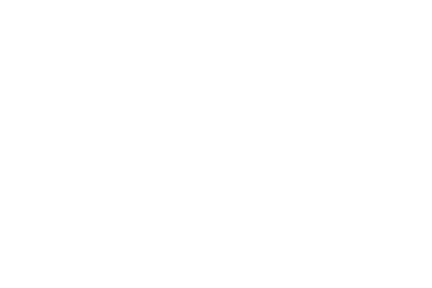

<IPython.core.display.Javascript object>


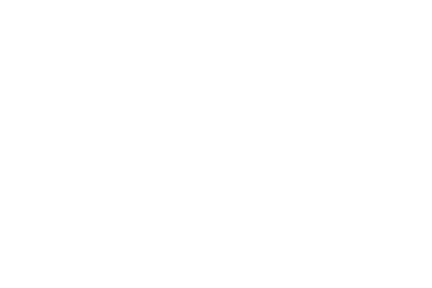

In [86]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = Res_sum / Passed
X[X**2 + Y**2 > 1] = np.inf
ax.plot_surface(X, Y, Z, cmap='spring')

<IPython.core.display.Javascript object>


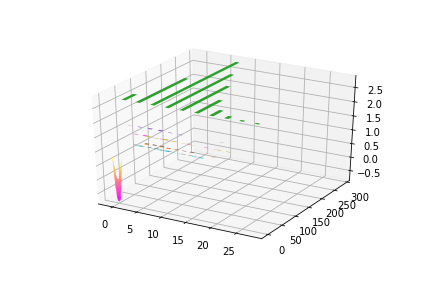

In [87]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = X**2 - Y**2
X[X**2 + Y**2 > 1] = np.inf
Z[Z == np.inf] = 0
ax.plot_surface(X, Y, Z, cmap='spring')

# Задание 9.
### Рассмотреть два вида процессов:
$\bullet$ Винеровский процесс $W(t),\ t \in [0, 1],\ W(0) = 0$;

$\bullet$ Процесс Орнштейна-Уленбека $X(t),\ t \in [0, 1],\ X(0) = X_0$, то есть стационарный марковский гауссовский процесс, начальное значение $X_0$ генерируется случайным образом так, что чтобы полученный процесс был стационарным.
### Для данных гауссовских процессов:

1) найти ковариационную функцию и переходные вероятности;

2) моделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка;

3) построить график траектории, не соединяя точки ломанной, с целью получения визуально непрерывной линии.

## Метод добавления разбиения отрезка.

Рассмотрим моделирование некоторого случайного процесса $X(t)$ на отрезке $[t_0, t_1]$

1. моделировние $X_0 = X(t_0)$;

2. моделирование $X(t_1)$ по условному распределению $[X(t_1)|X(t_0)]$;

3. рассмотрим отрезок $[t_i, t_{i + 1}]$, на концах которого определены $$X(t_i) = x_{i},\ X(t_{i + 1}) = x_{i + 1},$$ добавим узел $$t = \dfrac{t_{i + 1} - t_i}{2}$$ и построим $X(t)$ с использованием распределения случайной величины $$[X(t)|X(t_i) = x_{i},\ X(t_{i + 1}) = x_{i + 1}];$$

4. повторятть третий шаг до достижения нужного шага сетки.

## Винеровский процесс
Винеровский процесс --- гауссовский процесс Леви, то есть процесс с независимыми приращениями такой, что:

$\bullet\ W_0= 0;$

$\bullet\ \mu(h) = \mathbb{E}(W_{t + h} - W_{t}) = 0;$

$\bullet\ \sigma^2(h) = \mathbb{D}(W_{t + h} - W_{t}) = \sigma^2 h.$

### Найдём ковариационную функцию для винеровского процесса.

$$K(t_1, t_2) = \mathbb{E}[W(t_1)W(t_2)],$$

не ограничивая общности суждений, будем считать, что $t_1 < t_2$, тогда:

$$K(t_1, t_2) = \mathbb{E}[W(t_1)W(t_2)] = \mathbb{E}W^2(t_1) + \mathbb{E}[W(t_1) - W_0][W(t_2) - W(t_1)] = $$
$$= \sigma ^2 t_1 + \mathbb{E}W(t_1)\mathbb{E}[W(t_2) - W(t_1)] = \sigma^2 t_1.$$

Таким образом, ковариационная функция винеровского процесса:

$$K(s, t) = \min(s, t) \sigma^2.$$

### Моделирование винеровского процесса

Найдем распределение 
$$Y = [W(t)|W(t_i) = x_i,\ W(t_{i + 1}) = x_{i + 1}],$$
где $t = \dfrac{t_{i + 1} - t_i}{2}$.

Одно из свойств винеровского процесса $W(t) \sim \mathcal{N}(0, \sigma^2)$, тогда $Y$ имеет плотность распределение
$$p_Y(x) = \dfrac{p_3(x_i, x, x_{i + 1})}{p_2(x_i, x_{i + 1})},$$

где $p_3(x_i, x, x_{i + 1})$ - совместная плотность $[W(t_i), W(t), W(t_{i + 1})]$, а $p_2(x_i, x_{i + 1})$ - совместная плотность $[W(t_i), W(t_{i + 1})]$.

# Задание 11.
### Построить двумерное пуассоновское поле, отвечающее пуассоновскому процессу:

### 1. Первая интерпритация: система массового обслуживания. При этом, первая координата поля - время поступления заявки в СМО (равномерное распределение), вторая - время ее обслуживания (распределение $\chi^2$ с 10 степенями свободы).

Рассмотрим работу системы массового обслуживания на отрезке времени $[0, T]$. За это время на участок приходит $\eta \sim \mathcal{Pois}(\lambda T)$, где $\lambda$ - интенсивность очереди. Момент прихода $i-$го человека $t_i \sim \mathcal{U}([0, T])$, а его время ожидания $s_i \sim \mathcal{\chi^2}(10)$. Обозначим время обработки заявки $i$-го человека через $X_i$, тогда:

$$
X_i = 
\left\{
\begin{aligned}
& t_i + s_i,\ X_{i - 1} \leqslant t_i\ (\text{в очереди никого нет});\\
& X_{i - 1} + s_i,\ X_{i - 1} > t_i\ (\text{очередь не пуста}).
\end{aligned}
\right.
$$

В таком случае, число людей в очереди в момент времени $t$ равен $N(t) = \sum\limits_{i = 0}^{\eta}\mathbb{I}_{t \in [t_i, X_i)}$, то есть сумма людей, которые уже встали в очередь и запросы которых не были обработаны к моменты $t$.

Заметим, что очередь не будет накапливаться до бесконечности лишь в том случае, если среднее время обработки заявки больше, чем средний интервал между появлением новых людей в очереди. 

$t_i \sim \mathcal{U}[0, T]$, следовательно $(t_{i + 1} - t_i) \sim \mathcal{Exp}(\lambda)$. Известно, что $$\mathbb{E}(t_{i + 1} - t_i) = \dfrac{1}{\lambda},\quad \mathbb{E}s_i = 10.$$

Тогда наше условие корректной работы СМО (отсутствие бесконечно длинной очереди) эквивалентно $\dfrac{1}{\lambda} < 10$.

In [109]:
def chi2_rnd(k, size):
    mu = 0
    sigma = 1
    return np.sum((np.reshape(normal(mu, sigma, size * k) ** 2, (size, k))), 1)

In [197]:
# определение значения параметра
lam = 0.1
T = 100
k = 10
n = 1000

In [215]:
def queue_mod(t):
    eta = np.size(t)
    s = chi2_rnd(k, eta)
    X = np.zeros(eta)
    X[0] = t[0] + s[0]
    for i in range(1, eta):
        X[i] = max(X[i - 1], t[i]) + s[i]
    N = lambda tau: ((tau > t) * (tau < X)).sum()
    return [N, X]

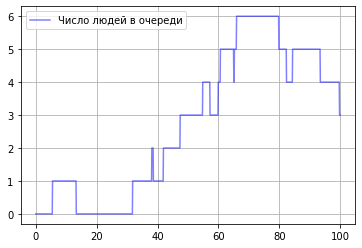

In [356]:
eta = np.random.poisson(lam * T)

t = np.sort(T * np.random.rand(int(eta)))

[N, X] = queue_mod(t)

tt = np.linspace(0, T, n)
y = np.zeros(n)
for i in range(0, n):
    y[i] = N(tt[i])

plt.plot(tt, y, color = 'b', alpha = 0.5, label = 'Число людей в очереди')
plt.grid()
plt.legend()
plt.show()

### 2. Вторая интерпретация: система массового обслуживания с циклической интенсивностью $\lambda(1 + \cos(t))$ и единичными скачками. Свести данную задачу моделирования неоднородного пуассоновского процесса при помощи метода Льюса и Шедлера к моделированию двумерного пуассоновского поля, где первая координата имеет равномерное распределение, а вторая - распределение Бернулли.

Рассмотрим работу СМО c циклической интенсивностью $\lambda(t)$ на отрезке времени $[0, T]$. $\lambda(t) = \lambda (1 - \cos(t)) \leqslant 2\lambda$ для любого $t \in [0, T]$. Тогда получим число людей, встающих в очередь $\eta \sim \mathcal{Pois}(2\lambda)$ и получим соответствующее число равномерно распределенных моментов времени, в которые приходят эти люди $t_1', \ldots, t_{\eta}'$. 

Получим новую выборку моментов времени $t_1, \ldots, t_n$ следующим образом: каждую случайную величину $t_i'$ будем принимать в новую выборку с вероятностью $p_i = \dfrac{\lambda(t_i')}{2 \lambda} = \dfrac{1 + \cos(t_i')}{2}.$ Полученная выборка будет определнять моменты появления новых людей в очереди в системе массового обслуживания с циклической интенсивностью. 

Далее рассуждения повторяют пункт 1 задания 11.

In [336]:
lam = 0.1
T = 100
k = 10
n = 1000

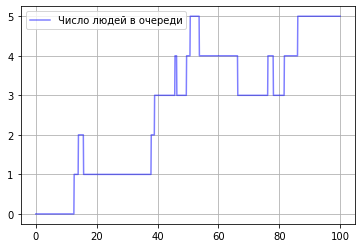

In [353]:
eta = np.random.poisson(2 * lam * T)
t1 = (T * np.random.rand(int(eta)))
idx = (np.random.rand(eta)) < ((1 + np.cos(t1)) / 2)
t = t1[idx]

[N, X] = queue_mod(t)

tt = np.linspace(0, T, n)
y = np.zeros(n)
for i in range(0, n):
    y[i] = N(tt[i])

plt.plot(tt, y, color = 'b', alpha = 0.5, label = 'Число людей в очереди')
plt.legend()
plt.grid()
plt.show()

### 3. Третья интерпретация: работа страховой компании. Первая координата - момент наступления страхового случая (равномерное распределение), вторая координата - величина ущерба (распределение Парето). Поступление капитала по времени линейно со скоростью $c > 0$, начальный капитал $W > 0$.

Рассмотрим работу страховой компании на отрезке времени $[0, T]$. Число страховых случаев $N \sim \mathcal{Pois}(\lambda)$. Моменты наступления страховых случаев $t_i \sim \mathcal{U}(0, T)$, величины ущерба в соответствующие моменты времени $X_i \sim \mathcal{Par}(k)$, где $\mathcal{Par}(k)$ - распределение Парето с параметром $k$.

Будем моделировать распределение Парето методом обращения функции распределения. Для распределения Парето:
$$F_{Par} = 1 - \left[ \frac{1}{x}\right]^k.$$
Тогда при $y \sim \mathcal{U}[0, 1]$ случайная величина $x = (1 - y)^-\frac{1}{k}\ \sim \mathcal{Par}(k).$

In [512]:
def Pareto(k, size):
    y = np.random.rand(size)
    return (1 - y) ** (- (1 / k))

Капитал поступает линейно со скоростью $c$, а начальный капитал равен $W$. Также при возникновении страховых случаев необходимо выплачивать соответствующие величины ущерба, следовательно:
$$K(t) = W + ct - \sum\limits_{i = 1}^{N(t)} X_i,$$
где $N(t)$ - число страховых случаев к моменту времени $t$.

Рассмотрим поведение системы при различных параметрах. Будем рассматривать $k > 1$, так как в противном случае математическое ожидание случайной величины не определено. 

Рассмотрим среднее значение капитала в момент времени $t$:
$$\mathbb{E}K(t) = W + ct - \lambda t \frac{k}{k - 1} = W + t(c - \dfrac{\lambda k}{k + 1}).$$
Таким образом, при $c > \dfrac{\lambda k}{k - 1}$ капитал будет расти, а в обратном случае быстро будет израсходован.

In [599]:
lam = 1
k = 2
T = 100
c = 2
W = 50
n = 1000

In [570]:
def K(tau, f, xx, t):
    if (tau < t[0]):
        return W + c*tau
    res = [((t[i] <= tau) & (t[i + 1] > tau)) for i in range(0, eta - 1)]
    if (np.sum(res) == 0):
        res = np.concatenate((res, [1])).astype(bool)
    else:
        res = np.concatenate((res, [0])).astype(bool)
    if (W + c * tau - xx[res] <= 0):
        f = False
    return f * (W + c * tau - xx[res]) 


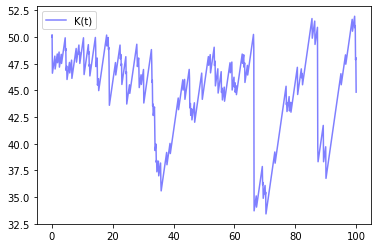

In [602]:
eta = np.random.poisson(lam * T)
t = np.sort(T * np.random.rand(eta))
X = Pareto(k, eta)
f = True

kk = np.zeros(eta)
xx = np.zeros(eta)
kk[0] = W
for i in range(1, eta):
    xx[i] = xx[i - 1] + X[i]
    
tt = np.linspace(0, T, n)
yy = np.zeros(n)

for i in range(0, n):
    yy[i] = K(tt[i], f, xx, t)

    
plt.plot(tt, yy, color = 'b', alpha = 0.5, label = 'K(t)')
plt.legend()
plt.show()